# Data Science aplicado a lista de espera do SUS na cidade do Rio de janeiro

### Conhecendo o problema


O objetivo deste projeto é verificar o comportamento da lista de espera para realização de procedimentos no SUS da cidade do Rio de janeiro.

### Conhecendo os dados

Os dados utilizados foram fornecidos através dos dados abertos do portal da transparência.
Fonte: https://dados.gov.br/dataset/covid-19-vacinacao

O dicionário dos dados se encontra também na página acima.    

In [20]:
#Importando as bibliotecas
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.offline as py
import plotly.graph_objs as go

In [21]:
%%time
#Importando o dataframe
df = pd.read_csv("Registros de Vacinação COVID19.csv",sep=",",encoding='UTF-8')

Wall time: 28.7 s


In [22]:
#Inspecionando os dados
print("Informações do dataset:")
print(df.info())

print("Nomes das colunas:")
print(df.columns.values)

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188463 entries, 0 to 2188462
Data columns (total 32 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         object 
 8   paciente_endereco_coPais                  object 
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_endereco_cep                     object 
 13  paciente_nacionalidade_enumNacion

In [23]:
df

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,d5e95060-b860-4616-823f-bab64c08fe17-i0b0,bbac0fe7260167e24ffb1267ea23e194a5918c9eb3670b...,82.0,1938-02-19,F,5.0,INDIGENA,291140,10,GLORIA,...,7.0,Povos Indígenas,202010027,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-20T00:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI
1,acf53ddf-3845-4b09-9405-88937dc74c30-i0b0,e2879d630364cfaa7caba0b0cf00f05ed94f03ae9b64ee...,35.0,1985-11-22,F,3.0,PARDA,280440,10,NEOPOLIS,...,9.0,Trabalhadores de Saúde,200280,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-09T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI
2,f24ee42d-99ae-4057-9513-158dab8935de-i0b0,34ce8ee4c6f5ec52f164b0f3c248bca39364dfad5a3f95...,78.0,1942-03-05,F,4.0,AMARELA,230730,10,JUAZEIRO DO NORTE,...,2.0,Faixa Etária,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-04T03:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI
3,aa45491d-af26-475b-a843-150269052658-i0b0,24c16c887cc6e7f1dd5fceb9dddb625260165d43f2284f...,87.0,1933-07-01,M,1.0,BRANCA,330455,10,RIO DE JANEIRO,...,2.0,Faixa Etária,202009015,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-10T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI
4,a6734a0e-9657-4180-81a1-3d2cad30caa0-i0b0,d0380a6cbe5a1419a679952a1fa3224c57dde2bb3ba6dc...,30.0,1990-03-27,F,4.0,AMARELA,316250,10,SAO JOAO DEL REI,...,9.0,Trabalhadores de Saúde,202010038,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-22T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188458,6447b9fd-2b18-4f1c-b3e0-8d89fe0544eb-i0b0,88c4f1bc4713e37712b763696d069e5ae0212331444f33...,32.0,1988-04-05,F,99.0,SEM INFORMACAO,530010,10,BRASILIA,...,9.0,Trabalhadores de Saúde,202010021,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-27T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI
2188459,dbe95c6b-e3c2-409e-84af-185dd9992d08-i0b0,a433d4b4f7ae62b2f3ee4620c99e30497888a56a68d4cf...,38.0,1982-11-15,F,99.0,SEM INFORMACAO,240810,10,NATAL,...,9.0,Trabalhadores de Saúde,4120Z005,FUNDACAO OSWALDO CRUZ,NaN,2021-01-26T00:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,O sistema RN+Vacina auxilia o Governo do Estad...
2188460,bc6ce1f9-86d6-4cd4-bb66-a49201040fe5-i0b0,9bfe06ec0f3be6730abc54fb59295249fd0c0f23ef561e...,26.0,1994-04-03,M,1.0,BRANCA,521930,10,SANTA HELENA DE GOIAS,...,9.0,Trabalhadores de Saúde,202010031,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-21T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI
2188461,9c1cf1b7-9c9b-4719-ab1f-61f53bf43faa-i0b0,ae78ac4930eb9c2220c79a7558748754aa1cf5756600ee...,27.0,1993-05-28,F,99.0,SEM INFORMACAO,251290,10,RIO TINTO,...,9.0,Trabalhadores de Saúde,202009011,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-21T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI


### Tratando os dados

In [24]:
#Identificando dados nulos do dataframe
print("Dados nulos:")
print(df.isnull().sum())

Dados nulos:
document_id                                      0
paciente_id                                      1
paciente_idade                                   1
paciente_dataNascimento                          1
paciente_enumSexoBiologico                       1
paciente_racaCor_codigo                          1
paciente_racaCor_valor                           1
paciente_endereco_coIbgeMunicipio                0
paciente_endereco_coPais                         0
paciente_endereco_nmMunicipio                    0
paciente_endereco_nmPais                         0
paciente_endereco_uf                             0
paciente_endereco_cep                            0
paciente_nacionalidade_enumNacionalidade      4175
estabelecimento_valor                            0
estabelecimento_razaoSocial                  37848
estalecimento_noFantasia                     37848
estabelecimento_municipio_codigo             37848
estabelecimento_municipio_nome               37848
estabelecimento_uf

In [25]:
#Inspecionando os dados
print("Informações do dataset:")
print(df.info())

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188463 entries, 0 to 2188462
Data columns (total 32 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         object 
 8   paciente_endereco_coPais                  object 
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_endereco_cep                     object 
 13  paciente_nacionalidade_enumNacion

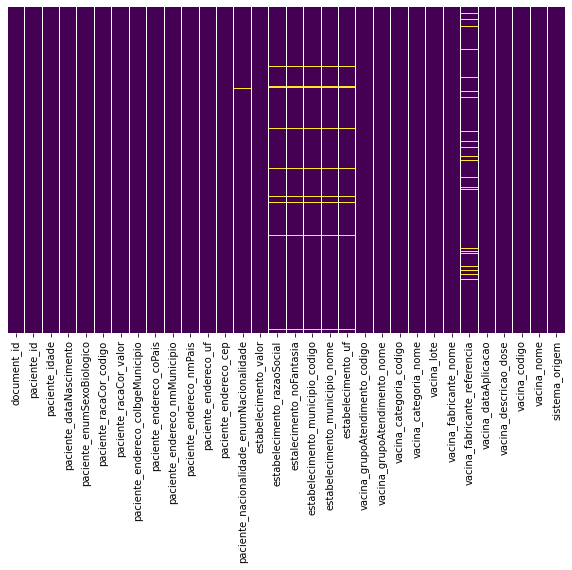

In [26]:
#Identificando visualmente os erros presentes nas colunas
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [27]:
#Dropa as colunas que não serão utilizadas
df.drop(['document_id','estabelecimento_razaoSocial','estalecimento_noFantasia','estabelecimento_municipio_codigo','estabelecimento_municipio_nome','estabelecimento_uf','vacina_fabricante_referencia','paciente_nacionalidade_enumNacionalidade','vacina_grupoAtendimento_nome','vacina_categoria_codigo','document_id','estabelecimento_valor','vacina_grupoAtendimento_codigo','vacina_lote','vacina_descricao_dose','vacina_codigo','sistema_origem'], inplace=True, axis=1)
df.dropna()
#Verificando se os dados foram dropados
print("Dados nulos:")
print(df.isnull().sum())

Dados nulos:
paciente_id                           1
paciente_idade                        1
paciente_dataNascimento               1
paciente_enumSexoBiologico            1
paciente_racaCor_codigo               1
paciente_racaCor_valor                1
paciente_endereco_coIbgeMunicipio     0
paciente_endereco_coPais              0
paciente_endereco_nmMunicipio         0
paciente_endereco_nmPais              0
paciente_endereco_uf                  0
paciente_endereco_cep                 0
vacina_categoria_nome                24
vacina_fabricante_nome                0
vacina_dataAplicacao                  0
vacina_nome                           0
dtype: int64


In [28]:
#Verificando memória utilizada
print("Informações do dataset:")
print(df.info())

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188463 entries, 0 to 2188462
Data columns (total 16 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   paciente_id                        object 
 1   paciente_idade                     float64
 2   paciente_dataNascimento            object 
 3   paciente_enumSexoBiologico         object 
 4   paciente_racaCor_codigo            float64
 5   paciente_racaCor_valor             object 
 6   paciente_endereco_coIbgeMunicipio  object 
 7   paciente_endereco_coPais           object 
 8   paciente_endereco_nmMunicipio      object 
 9   paciente_endereco_nmPais           object 
 10  paciente_endereco_uf               object 
 11  paciente_endereco_cep              object 
 12  vacina_categoria_nome              object 
 13  vacina_fabricante_nome             object 
 14  vacina_dataAplicacao               object 
 15  vacina_nome                        object 

### Histograma das idades

In [29]:
Analise_idades=df.filter(items=['paciente_idade','paciente_endereco_nmMunicipio',]).sort_values(by='paciente_idade',ascending=False)

print("Idades dos 5 pacientes mais idosos")
print(Analise_idades.head(5))

print("\nIdades dos 5 pacientes mais jovens")
print(Analise_idades.tail(5))

Idades dos 5 pacientes mais idosos
         paciente_idade paciente_endereco_nmMunicipio
1295587           121.0                     SAO PAULO
1008124           121.0                     GUARULHOS
409519            121.0                   IBICUITINGA
1772317           121.0                RIO DE JANEIRO
1341490           121.0                   PARAUAPEBAS

Idades dos 5 pacientes mais jovens
         paciente_idade paciente_endereco_nmMunicipio
1052394             0.0                BARRA DO CORDA
1858835             0.0       TENENTE LAURENTINO CRUZ
149336              0.0                    PARNAMIRIM
413469              0.0         CONCEICAO DO ARAGUAIA
1135049             NaN                          \\""


### Histograma das idades

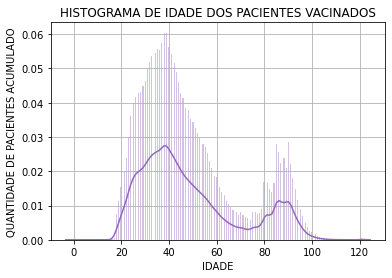

In [30]:
sns.distplot(Analise_idades['paciente_idade'], bins='rice', color='tab:purple', hist=True)
plt.xlabel("IDADE")
plt.ylabel("QUANTIDADE DE PACIENTES ACUMULADO")
plt.title("HISTOGRAMA DE IDADE DOS PACIENTES VACINADOS")
plt.grid('true')
plt.savefig('HISTOGRAMA DE IDADE',dpi=100)

### Quantidade vacinados por fabricante

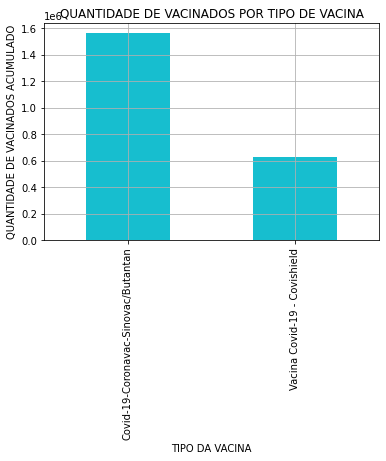

In [31]:
Analise_fabricantes=df.filter(items=['paciente_id','vacina_nome']).sort_values(by='vacina_nome',ascending=False)
Analise_fabricantes['vacina_nome'].value_counts().sort_values(ascending=False).head(10).plot.bar(color=('tab:cyan'))
plt.ylabel("QUANTIDADE DE VACINADOS ACUMULADO")
plt.xlabel("TIPO DA VACINA")
plt.title("QUANTIDADE DE VACINADOS POR TIPO DE VACINA")
plt.grid('true')
plt.savefig('VACINADOS POR TIPO DE VACINA',dpi=100)

In [32]:
### Quantidade vacinados por fabricante

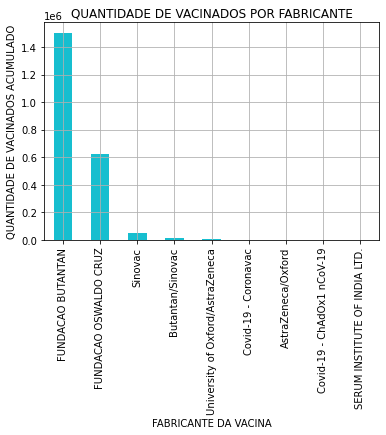

In [33]:
Analise_fabricantes=df.filter(items=['paciente_id','vacina_fabricante_nome']).sort_values(by='vacina_fabricante_nome',ascending=False)
Analise_fabricantes['vacina_fabricante_nome'].value_counts().sort_values(ascending=False).head(10).plot.bar(color=('tab:cyan'))
plt.ylabel("QUANTIDADE DE VACINADOS ACUMULADO")
plt.xlabel("FABRICANTE DA VACINA")
plt.title("QUANTIDADE DE VACINADOS POR FABRICANTE")
plt.grid('true')
plt.savefig('VACINADOS POR FABRICANTE',dpi=100)

### Quantidade vacinados x Sexo

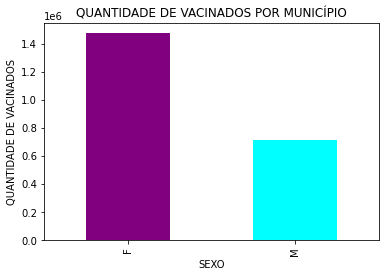

In [34]:
Analise_sexo=df.filter(items=['paciente_id','paciente_enumSexoBiologico']).sort_values(by='paciente_enumSexoBiologico',ascending=False)
Analise_sexo['paciente_enumSexoBiologico'].value_counts().sort_values(ascending=False).head(10).plot.bar(color=['purple', 'cyan'])
plt.ylabel("QUANTIDADE DE VACINADOS")
plt.xlabel("SEXO")
plt.title("QUANTIDADE DE VACINADOS POR MUNICÍPIO")
#plt.grid('true')
plt.savefig('VACINADOS POR SEXO',dpi=100)

### Cor dos vacinados

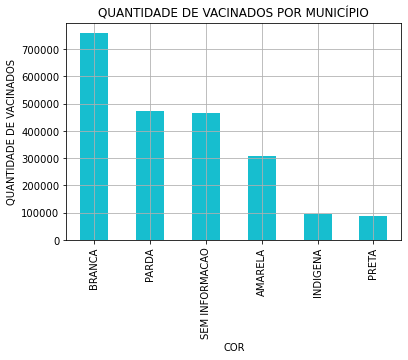

In [35]:
Analise_sexo=df.filter(items=['paciente_id','paciente_racaCor_valor']).sort_values(by='paciente_racaCor_valor',ascending=False)
Analise_sexo['paciente_racaCor_valor'].value_counts().sort_values(ascending=False).head(10).plot.bar(color=('tab:cyan'))
plt.ylabel("QUANTIDADE DE VACINADOS")
plt.xlabel("COR")
plt.title("QUANTIDADE DE VACINADOS POR MUNICÍPIO")
plt.grid('true')
plt.savefig('VACINADOS POR COR',dpi=100)

### Vacinados X Categoria

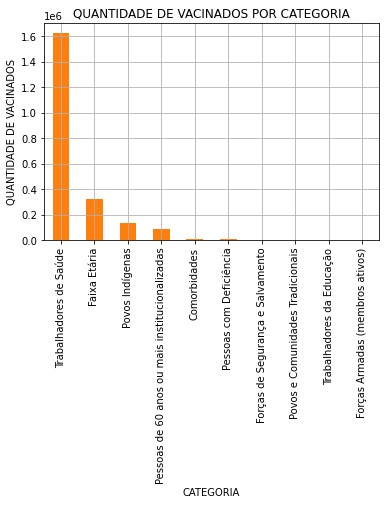

In [36]:
Analise_categoria=df.filter(items=['paciente_id','vacina_categoria_nome']).sort_values(by='vacina_categoria_nome',ascending=False)
Analise_categoria['vacina_categoria_nome'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='tab:orange')
plt.ylabel("QUANTIDADE DE VACINADOS")
plt.xlabel("CATEGORIA")
plt.title("QUANTIDADE DE VACINADOS POR CATEGORIA")
plt.grid('true')
plt.savefig('VACINADOS POR CATEGORIA',dpi=100)